In [ ]:
!git status


fatal: not a git repository (or any of the parent directories): .git


In [1]:
!git config --global user.name "FatemeAmr"
!git config --global user.email "fatemeameri305@gmail,com"


In [2]:
!git clone https://github.com/FatemeAmr/CTR_prediction.git


Cloning into 'CTR_prediction'...


In [3]:
import shutil
shutil.move('/content/CTR_prediction.ipynb', '/content/CTR_prediction/')

FileNotFoundError: [Errno 2] No such file or directory: '/content/CTR_prediction.ipynb'

#CTR prediction

In [ ]:
!pip install skimpy
from skimpy import skim
from sklearn.model_selection import train_test_split # Import the missing module
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score



##CTR prediction is a critical aspect of online advertising, directly impacting platform revenue and the success of marketing campaigns. In this task, you will explore the intricacies of user interaction data to predict the likelihood of a user clicking on an online advertisement. The dataset you’ll work with, contains 10 columns, with 9 of them representing an instance of a data record as features. You will be predicting the “Clicked on Ad” column, which represents if the visitor clicks on the ad.



###Load and the dataset.

In [ ]:
import pandas as pd

file_path = '/content/ad_10000records.csv'
df = pd.read_csv(file_path)
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


### The output indicates that there are no missing values in dataframe, as all columns show zero missing values. Additionally, we have removed any duplicate records from the dataframe.

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates if there are any
df = df.drop_duplicates()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


###The dataset contains 10 columns and 10,000 entries. The columns are as follows:

* Daily Time Spent on Site: Time (in minutes) the user spends on the site daily.
* Age: Age of the user.
Area Income: Average income of the user's area.
* Daily Internet Usage: Time (in minutes) the user spends on the internet daily.
* Ad Topic Line: The headline of the advertisement.
* City: The city where the user is located.
* Gender: Gender of the user.
Country: The country where the user is located.
* Timestamp: Time when the user clicked on the ad or not.
* Clicked on Ad: Whether the user clicked on the ad (1) or not (0).

## Summary statistics

In [ ]:
import numpy as np
df_numerical = df.select_dtypes(include=[np.float64])
summary_stats = df_numerical.describe(); summary_stats

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,9785.000000,9785.000000,9785.000000,9785.000000
mean,61.601379,35.839550,53948.143348,177.886144
std,15.698216,8.538524,13360.051625,40.861875
min,32.600000,19.000000,13996.500000,105.220000
25%,48.030000,29.000000,44174.250000,140.150000
50%,59.590000,35.000000,56180.930000,178.920000
75%,76.270000,41.000000,62669.590000,212.870000
max,90.970000,60.000000,79332.330000,269.960000


### Interpretation of Summary Statistics:

#### Daily Time Spent on Site:
- **Count:** 9785 observations
- **Mean:** On average, users spend about 61.60 minutes on the site daily.
- **Standard Deviation (std):** The time spent varies by approximately 15.70 minutes.
- **Minimum (min):** The least amount of time spent on the site is 32.6 minutes.
- **25th Percentile (25%):** 25% of users spend less than 48.03 minutes on the site.
- **Median (50%):** The median time spent is 59.59 minutes, meaning half of the users spend less than this time and half spend more.
- **75th Percentile (75%):** 25% of users spend more than 76.27 minutes on the site.
- **Maximum (max):** The maximum time spent on the site is 90.97 minutes.

#### Age:
- **Count:** 9785 observations
- **Mean:** The average age of the users is approximately 35.83 years.
- **Standard Deviation (std):** The age varies by about 8.52 years.
- **Minimum (min):** The youngest user is 19 years old.
- **25th Percentile (25%):** 25% of users are younger than 29 years.
- **Median (50%):** The median age is 35 years.
- **75th Percentile (75%):** 25% of users are older than 41 years.
- **Maximum (max):** The oldest user is 59 years old.

#### Area Income:
- **Count:** 9785 observations
- **Mean:** The average income of the users' area is approximately $53,954.65.
- **Standard Deviation (std):** The area income varies by about $13,341.31.
- **Minimum (min):** The lowest area income is $16,431.24.
- **25th Percentile (25%):** 25% of users come from areas where the income is less than $44,174.25.
- **Median (50%):** The median area income is $56,180.93.
- **75th Percentile (75%):** 25% of users come from areas where the income is more than $62,669.59.
- **Maximum (max):** The highest area income is $79,332.33.

#### Daily Internet Usage:
- **Count:** 9785 observations
- **Mean:** On average, users spend about 177.89 minutes on the internet daily.
- **Standard Deviation (std):** Daily internet usage varies by approximately 40.86 minutes.
- **Minimum (min):** The least amount of internet usage is 105.22 minutes.
- **25th Percentile (25%):** 25% of users spend less than 140.15 minutes on the internet daily.
- **Median (50%):** The median internet usage is 178.92 minutes.
- **75th Percentile (75%):** 25% of users spend more than 212.87 minutes on the internet daily.
- **Maximum (max):** The maximum internet usage is 269.96 minutes.

- Users, on average, spend about 61.60 minutes daily on the site, with a significant amount of variation.
- The age of the users is fairly distributed, with a median age of 35 years.
- The area income shows a wide range, with a median income of about $56,180.
- Users spend a considerable amount of time on the internet daily, averaging around 177.89 minutes.

## Histogram plot for quantitative variables

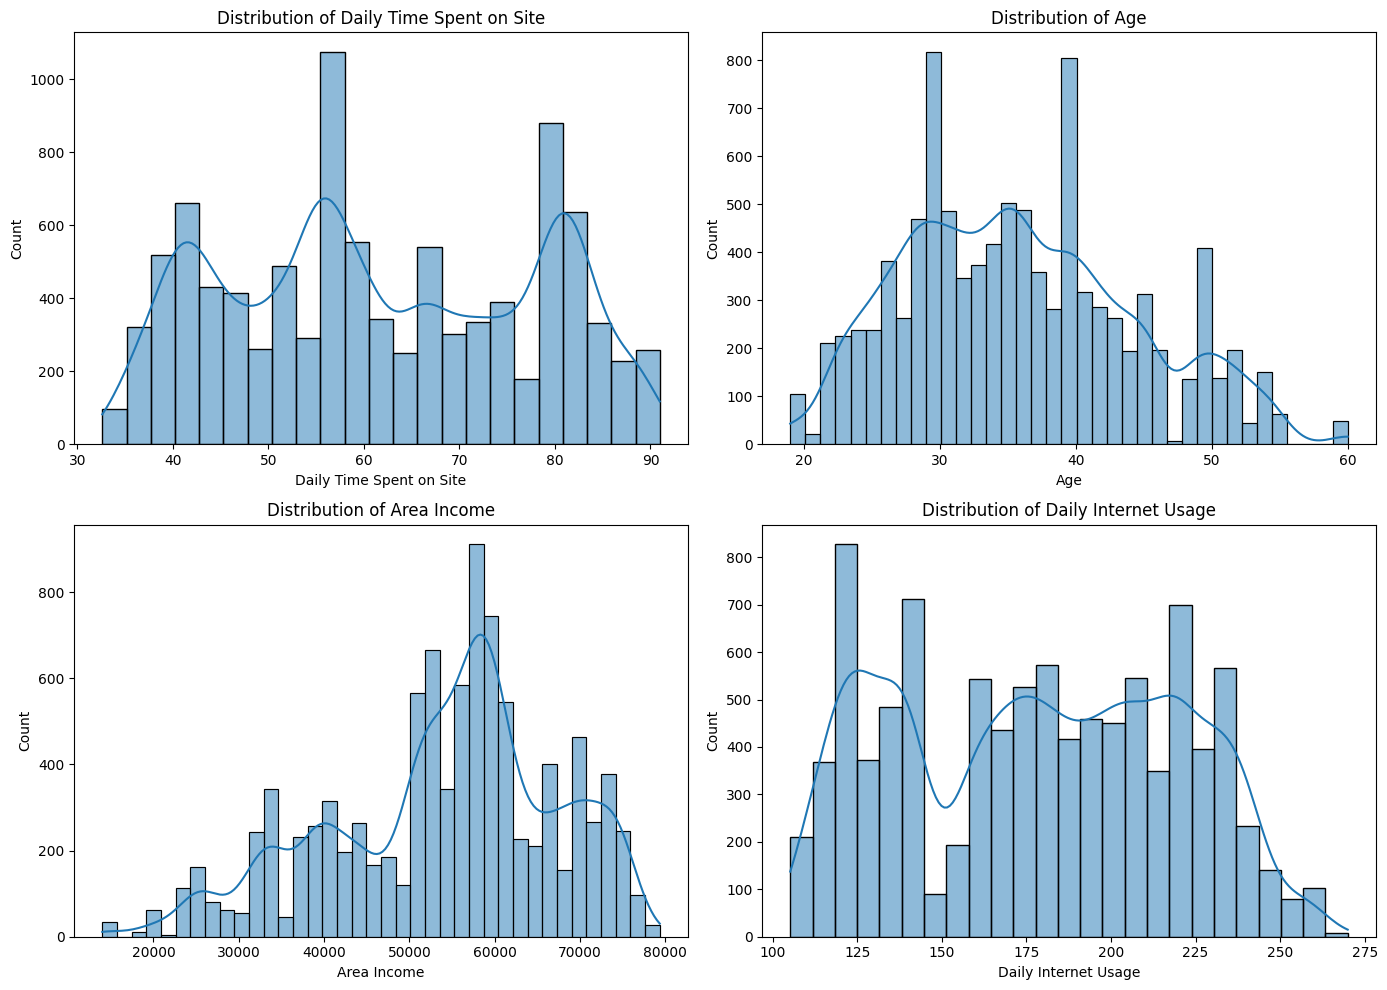

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Plot distributions
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

### Interpretation of Histograms:

#### Distribution of Daily Time Spent on Site:
- The distribution is fairly uniform with several peaks.
- There is a noticeable peak around 50-60 minutes and another one around 70-80 minutes.
- The data spans from 30 to 90 minutes, with most users spending between 40 and 80 minutes on the site.

#### Distribution of Age:
- The age distribution is roughly bell-shaped but with some skewness.
- There are prominent peaks around 30 and 40 years.
- The age range of users is from 19 to 60 years, with the majority between 25 and 45 years.

#### Distribution of Area Income:
- The income distribution is right-skewed, with a longer tail towards higher incomes.
- There are peaks around $40,000 to $60,000, with the highest peak near $50,000.
- The income ranges from $16,000 to $80,000, with most users' area income between $40,000 and $70,000.

#### Distribution of Daily Internet Usage:
- The distribution of daily internet usage shows multiple peaks.
- There is a noticeable peak around 125 minutes and another around 200 minutes.
- The data spans from 100 to 270 minutes, with most users spending between 120 and 230 minutes on the internet daily.

- **Daily Time Spent on Site**: Users typically spend around 50-80 minutes on the site, with no single dominant usage time.
- **Age**: Users are mostly between 25 and 45 years old, with peaks at 30 and 40 years.
- **Area Income**: Users come from areas with a wide range of incomes, mostly between $40,000 and $70,000.
- **Daily Internet Usage**: Users typically spend between 120 and 230 minutes on the internet daily, with notable peaks at 125 and 200 minutes.


## Bar and pie charts for qualitative variables

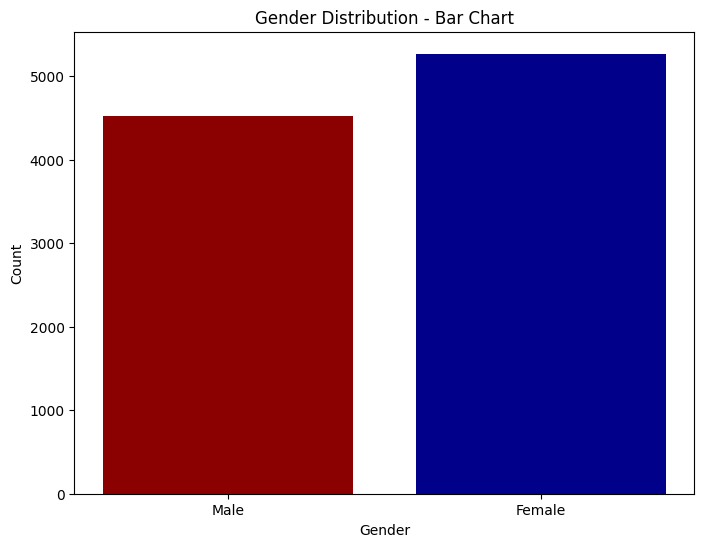

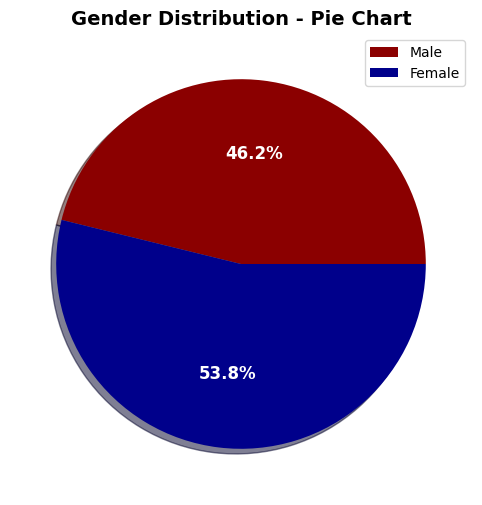

In [ ]:
from collections import Counter

gender_data = df['Gender']

# Count the occurrences of each category in the 'Gender' column
gender_counts = Counter(df['Gender'])

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.keys(), gender_counts.values(), color=["darkred", "darkblue"])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution - Bar Chart')
plt.show()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    x=list(gender_counts.values()),
    labels=list(gender_counts.keys()),
    colors=["darkred", "darkblue"],
    autopct="%.1f%%",
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'white'}
)
plt.legend(loc='upper right')
plt.title("Gender Distribution - Pie Chart", fontsize=14, fontweight="bold", color="black")
plt.show()


### Interpretation of Gender Distribution Bar Chart:

The bar chart represents the distribution of gender within the dataset. Here are the key points:

#### Count of Genders:
- **Male:** Approximately 4700 individuals
- **Female:** Approximately 5100 individuals

#### Observations:
- The number of females in the dataset is slightly higher than the number of males.
- Both genders are well-represented, with females making up a marginally larger portion of the sample.
- The dataset has a balanced representation of both genders, with a slight predominance of females. This can provide a balanced perspective in analyses involving gender comparisons.

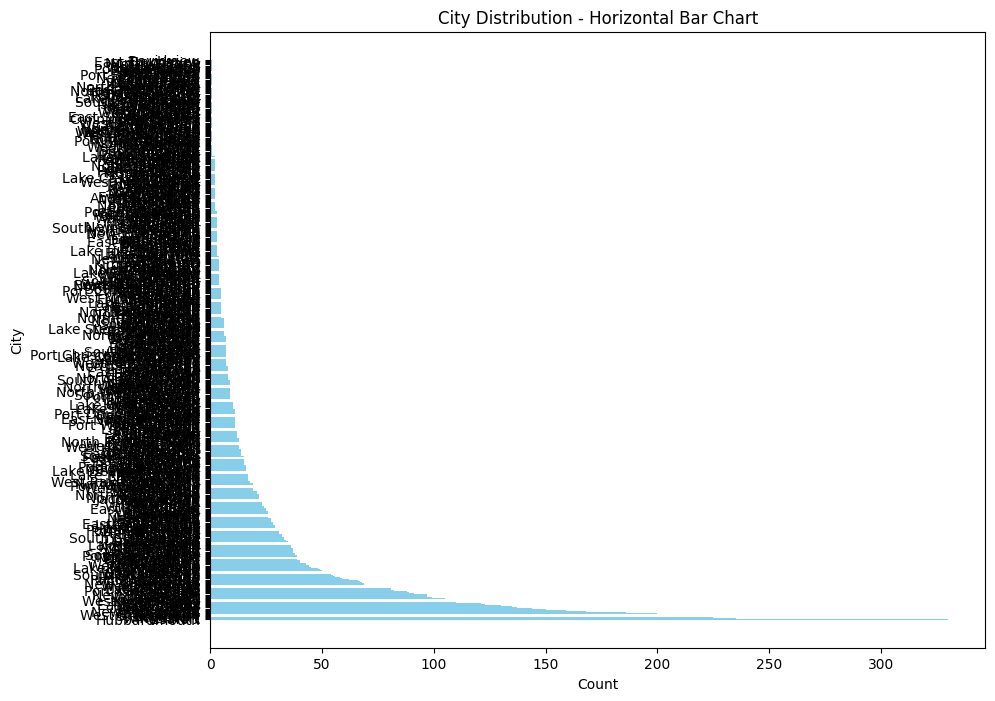

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

city_data = df['City']
city_counts = Counter(city_data)


city_counts_df = pd.DataFrame.from_dict(city_counts, orient='index').reset_index()
city_counts_df.columns = ['City', 'Count']
city_counts_df = city_counts_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(city_counts_df['City'], city_counts_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('City Distribution - Horizontal Bar Chart')
plt.show()


### Interpretation of City Distribution - Horizontal Bar Chart:

The horizontal bar chart displays the distribution of the count of users across different cities in the dataset.

1. **Long Tail Distribution**:
    - The distribution shows a long tail, indicating that there are many cities with a small number of users.
    - Only a few cities have a relatively high count of users.

2. **High Concentration in Few Cities**:
    - The most frequent city has slightly more than 300 users.
    - There is a sharp drop-off after the first few cities, with most cities having less than 50 users.

3. **Majority of Cities**:
    - The majority of cities are represented by a very small count, many even below 20 users.
    - This indicates a wide geographic diversity of the users, with no single city dominating the dataset.

4. **Distribution Shape**:
    - The distribution is heavily right-skewed, meaning a small number of cities account for a large portion of the users.
    - This is a common pattern in geographic distributions where a few urban centers tend to have higher population densities compared to numerous smaller towns or rural areas.
    
- The user base is widely spread across a large number of cities.
- A small number of cities have a relatively high number of users, while most cities have very few users.
- This distribution suggests that while the data includes a diverse set of locations, the majority of user activity is concentrated in a few key urban areas. This can inform decisions related to targeted advertising or resource allocation, focusing on cities with higher user counts for more significant impact.

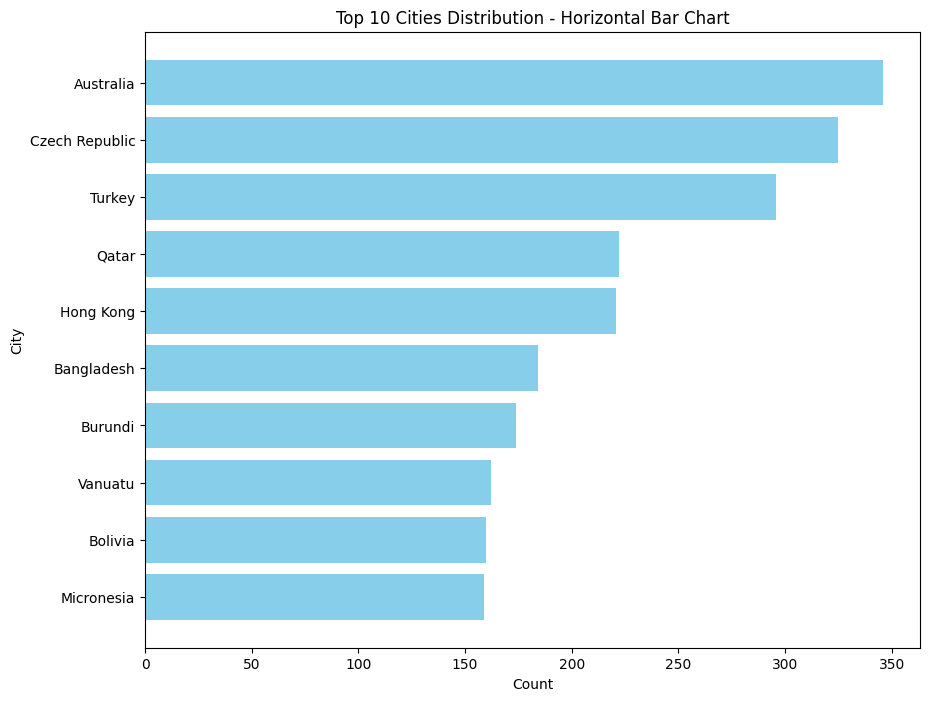

In [ ]:
city_data = df['Country']

city_counts = Counter(city_data)
city_counts_df = pd.DataFrame.from_dict(city_counts, orient='index').reset_index()
city_counts_df.columns = ['City', 'Count']
city_counts_df = city_counts_df.sort_values(by='Count', ascending=False)


top_cities_df = city_counts_df.head(10)
plt.figure(figsize=(10, 8))
plt.barh(top_cities_df['City'], top_cities_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Top 10 Cities Distribution - Horizontal Bar Chart')
plt.gca().invert_yaxis()
plt.show()


### Interpretation of Top 10 Cities Distribution - Horizontal Bar Chart:

1. **Australia**:
   - Has the highest count of users, slightly above 300.
   - This indicates a significant user base from this city, which could be a key area for targeted marketing or analysis.

2. **Czech Republic**:
   - The second highest count, around 270 users.
   - Shows strong user presence, slightly less than Australia but still substantial.

3. **Turkey**:
   - Approximately 250 users.
   - Another major city contributing significantly to the user base.

4. **Qatar**:
   - Around 200 users.
   - Represents a considerable portion of the user base.

5. **Hong Kong**:
   - Close to 190 users.
   - A notable number, indicating an active user presence.

6. **Bangladesh**:
   - Around 160 users.
   - Shows a reasonable number of users contributing to the dataset.

7. **Burundi**:
   - Approximately 150 users.
   - Slightly less than Bangladesh, but still a key city in the top 10.

8. **Vanuatu**:
   - Around 140 users.
   - A noticeable user base, indicating engagement from this city.

9. **Bolivia**:
   - Approximately 130 users.
   - Contributing significantly to the overall user distribution.

10. **Micronesia**:
    - Close to 130 users, similar to Bolivia.
    - Another city with a substantial user count.

#### Observations:
- **User Concentration**:
  - The top 10 cities have a relatively high concentration of users compared to the overall dataset.
  - Australia stands out as the city with the highest user count, followed closely by the Czech Republic and Turkey.

- **Geographic Diversity**:
  - The top cities represent a diverse set of geographic locations, indicating a broad international user base.
  - This diversity can provide valuable insights for understanding different regional behaviors and preferences.

- **Implications for Analysis**:
  - Focusing on these top cities can provide significant insights due to their large user bases.
  - Marketing strategies, resource allocation, and user engagement initiatives can be tailored based on the concentration of users in these key cities.



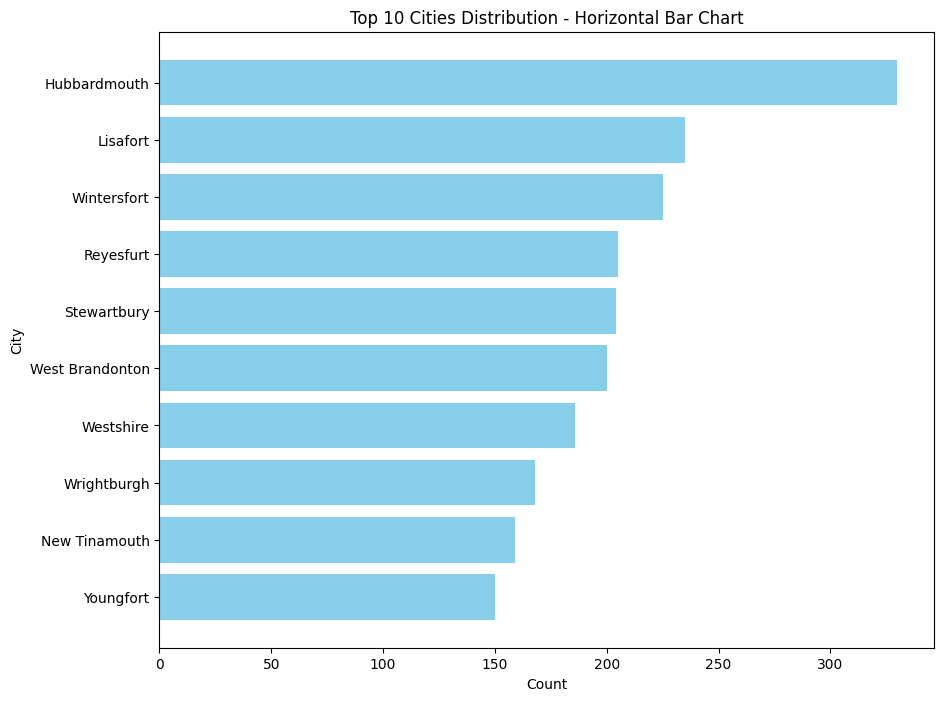

In [ ]:
city_data = df['City']


city_counts = Counter(city_data)
city_counts_df = pd.DataFrame.from_dict(city_counts, orient='index').reset_index()
city_counts_df.columns = ['City', 'Count']
city_counts_df = city_counts_df.sort_values(by='Count', ascending=False)

top_cities_df = city_counts_df.head(10)

plt.figure(figsize=(10, 8))
plt.barh(top_cities_df['City'], top_cities_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Top 10 Cities Distribution - Horizontal Bar Chart')
plt.gca().invert_yaxis()
plt.show()


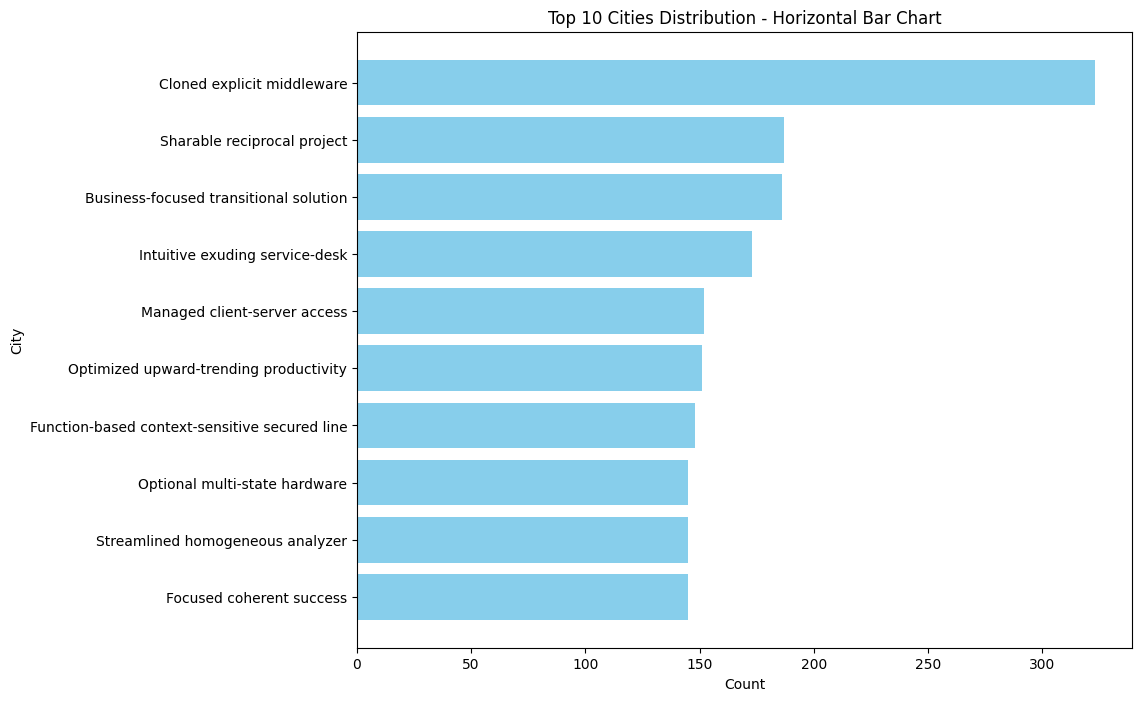

In [ ]:
city_data = df['Ad Topic Line']

city_counts = Counter(city_data)

city_counts_df = pd.DataFrame.from_dict(city_counts, orient='index').reset_index()
city_counts_df.columns = ['City', 'Count']
city_counts_df = city_counts_df.sort_values(by='Count', ascending=False)

top_cities_df = city_counts_df.head(10)

plt.figure(figsize=(10, 8))
plt.barh(top_cities_df['City'], top_cities_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Top 10 Cities Distribution - Horizontal Bar Chart')
plt.gca().invert_yaxis()
plt.show()


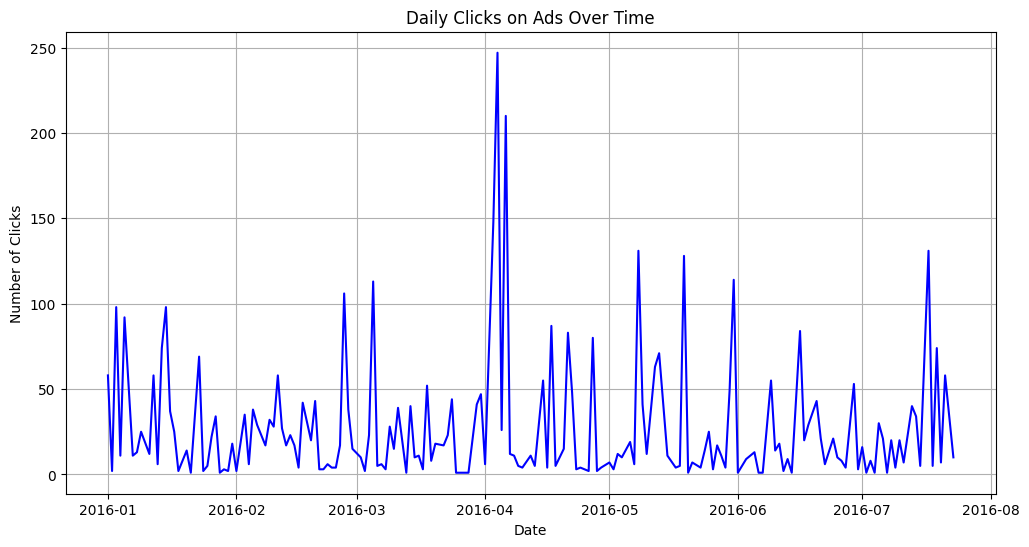

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date
clicks_per_day = df[df['Clicked on Ad'] == 1].groupby('Date').size()


plt.figure(figsize=(12, 6))
clicks_per_day.plot(kind='line', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.title('Daily Clicks on Ads Over Time')
plt.grid(True)
plt.show()

 The graph shows the daily clicks on ads over a specific time period.
- **X-Axis (Horizontal)**: Represents the date, ranging from January 2016 to August 2016.
- **Y-Axis (Vertical)**: Indicates the number of clicks, varying from 0 to 250.
- **Trends**: The graph exhibits fluctuations in daily clicks, with several peaks. One peak stands out, surpassing 200 clicks.


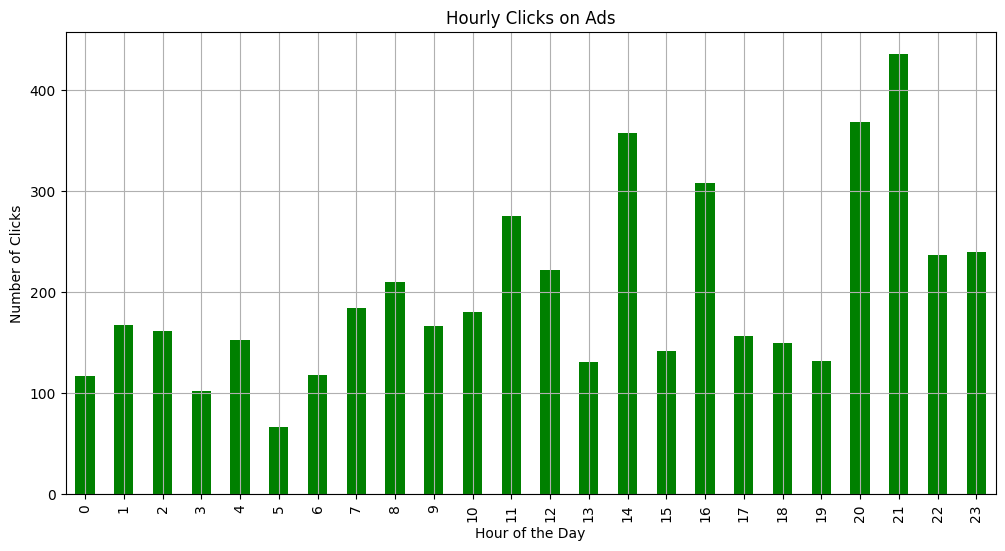

In [ ]:

df['Hour'] = df['Timestamp'].dt.hour
clicks_per_hour = df[df['Clicked on Ad'] == 1].groupby('Hour').size()

plt.figure(figsize=(12, 6))
clicks_per_hour.plot(kind='bar', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Clicks')
plt.title('Hourly Clicks on Ads')
plt.grid(True)
plt.show()

There is an almost upward trend between the number of clicks as the hours of the day increase towards night.

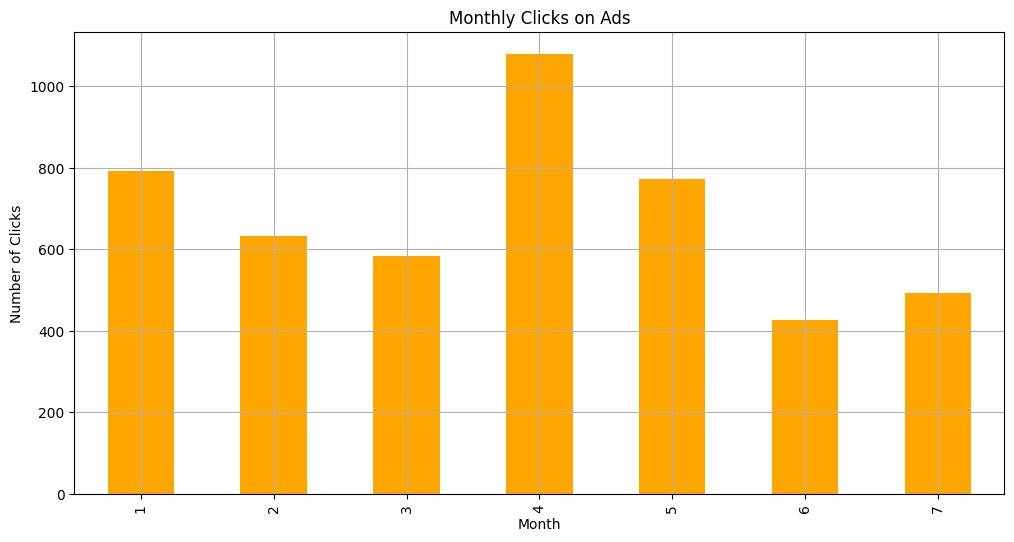

In [ ]:
df['Month'] = df['Timestamp'].dt.month

clicks_per_month = df[df['Clicked on Ad'] == 1].groupby('Month').size()

plt.figure(figsize=(12, 6))
clicks_per_month.plot(kind='bar', color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Clicks')
plt.title('Monthly Clicks on Ads')
plt.grid(True)
plt.show()


The chart titled "Monthly Clicks on Ads" displays the number of clicks on advertisements over a period of 12 months. Each month is represented by a vertical bar, and the height of each bar corresponds to the number of clicks for that month. The y-axis is labeled "Number of Clicks" and ranges from 0 to 1000 in increments of 200. The x-axis is labeled "Month" and has values from 1 to 12, representing each month in a year. It can be seen that there is no special trend between the two variables.

<ipython-input-15-5fa4f315cf99>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Age', data=df, palette="Set3")


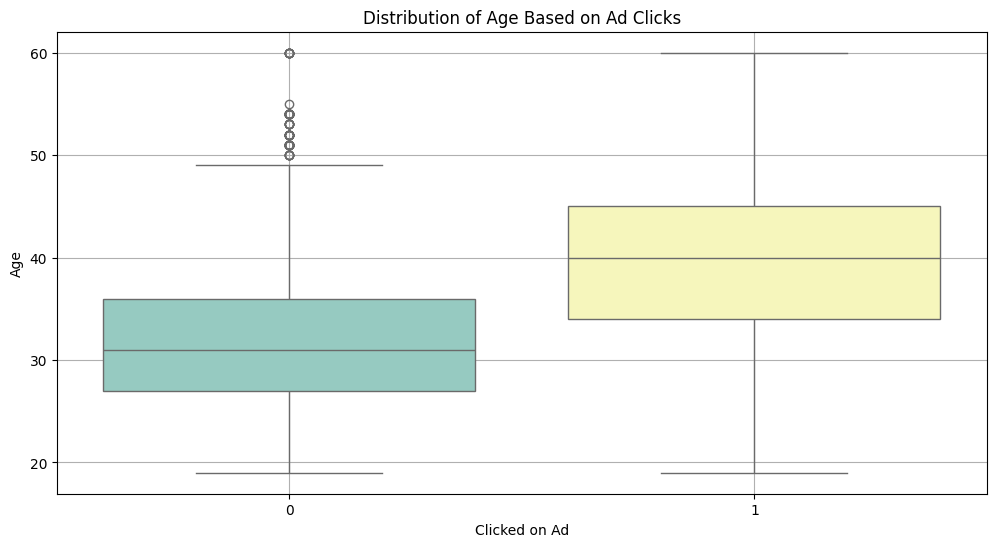

In [ ]:
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.boxplot(x='Clicked on Ad', y='Age', data=df, palette="Set3")
plt.xlabel('Clicked on Ad')
plt.ylabel('Age')
plt.title('Distribution of Age Based on Ad Clicks')
plt.grid(True)
plt.show()

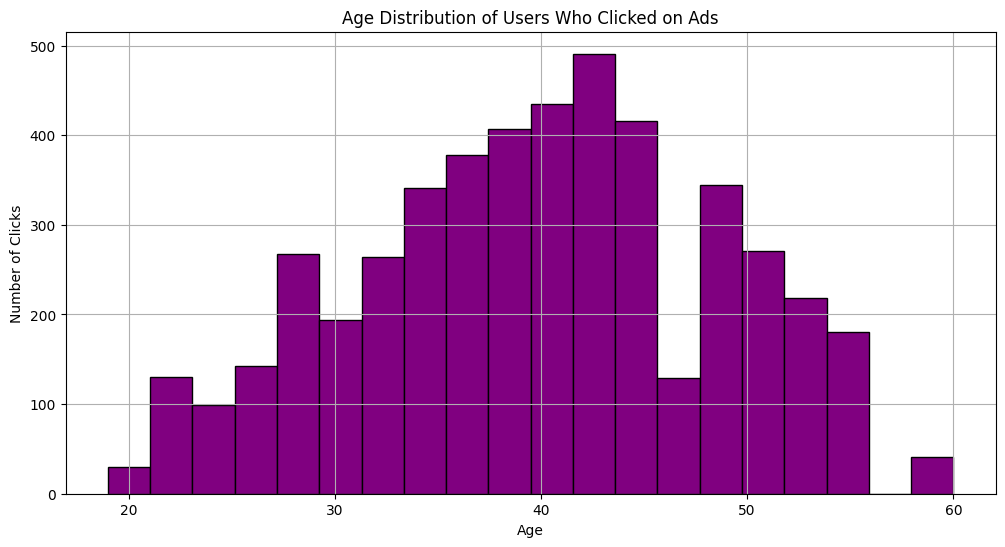

In [ ]:
clicked_age_data = df[df['Clicked on Ad'] == 1]['Age']

plt.figure(figsize=(12, 6))
plt.hist(clicked_age_data, bins=20, color='purple', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Clicks')
plt.title('Age Distribution of Users Who Clicked on Ads')
plt.grid(True)
plt.show()



- **Horizontal Axis (X)**: Represents the age of users, ranging from approximately 10 to 60 years.
- **Vertical Axis (Y)**: Indicates the number of clicks, with values ranging from 0 to 500.
- **Histogram Bars**: Each bar represents a different age group, with the tallest bar appearing in the range of 30-35 years. This suggests that users within this age group have the highest number of clicks on ads.
The concentration of clicks is highest among users aged 25 to 40 and An almost normal distribution is observed between age and the number of clicks.



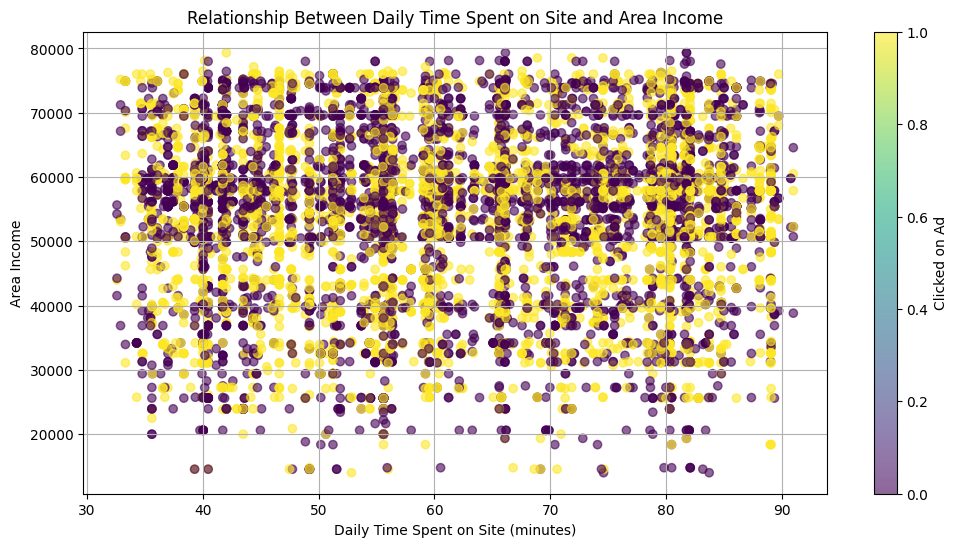

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Daily Time Spent on Site'], df['Area Income'], c=df['Clicked on Ad'], cmap='viridis', alpha=0.6)
plt.xlabel('Daily Time Spent on Site (minutes)')
plt.ylabel('Area Income')
plt.title('Relationship Between Daily Time Spent on Site and Area Income')
plt.colorbar(label='Clicked on Ad')
plt.grid(True)
plt.show()

This scatter plot graph titled "Relationship Between Daily Time Spent on Site and Area Income" shows the correlation between the daily time spent on a website (in minutes) and the area income. The x-axis represents the daily time spent on the site, ranging from 30 to 90 minutes. The y-axis represents area income, with values ranging from approximately 20,000 to 80,000. The points are color-coded based on a scale from -0.2 to 1.0, as indicated by the color bar on the right side of the graph. This color scale likely represents another variable, such as click rate or engagement level. The plot shows a dense concentration of points across the entire range of daily time spent on the site, suggesting variability in area income at all levels of daily time spent on the site.


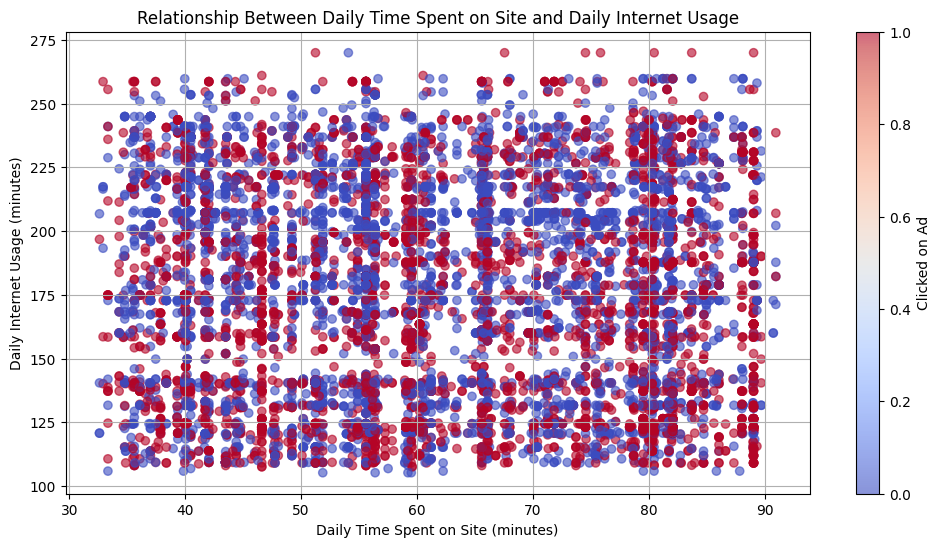

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Daily Time Spent on Site'], df['Daily Internet Usage'], c=df['Clicked on Ad'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Daily Time Spent on Site (minutes)')
plt.ylabel('Daily Internet Usage (minutes)')
plt.title('Relationship Between Daily Time Spent on Site and Daily Internet Usage')
plt.colorbar(label='Clicked on Ad')
plt.grid(True)
plt.show()


This scatter plot graph titled "Relationship Between Area Income and Age" shows the correlation between area income and age. The x-axis represents area income (ranging from 20,000 to 80,000), and the y-axis represents age (approximately 20 to 60 years). The points are color-coded based on the likelihood of clicking on an ad, with purple indicating a lower probability (0.0) and yellow indicating a higher probability (1.0). The distribution of points suggests that there might be a relationship between area income, age, and the likelihood of clicking on an ad. This graph could be relevant for analyzing consumer behavior in relation to demographic factors.

<ipython-input-20-aaecb5085430>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Area Income', data=df, palette="Set1")


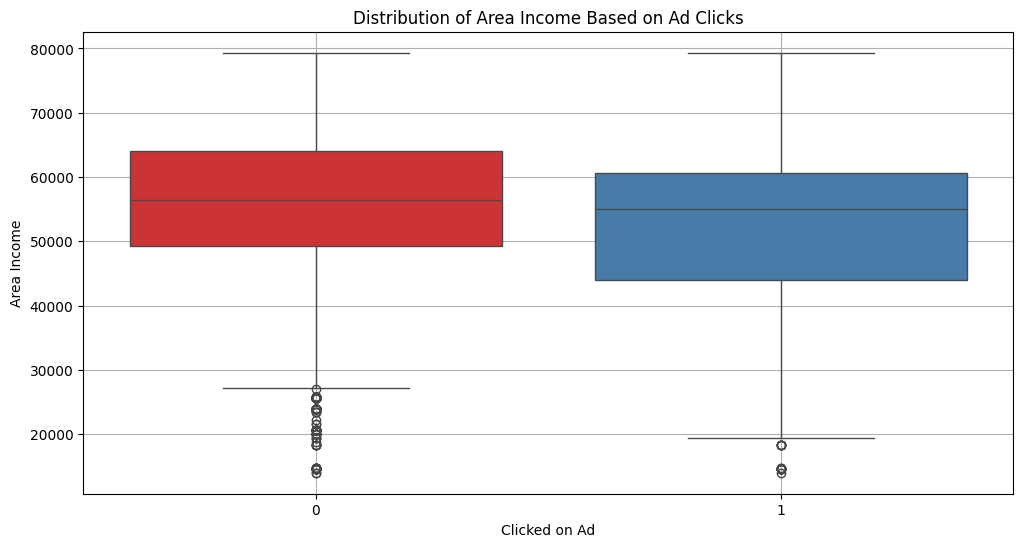

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Clicked on Ad', y='Area Income', data=df, palette="Set1")
plt.xlabel('Clicked on Ad')
plt.ylabel('Area Income')
plt.title('Distribution of Area Income Based on Ad Clicks')
plt.grid(True)
plt.show()


This box plot represents the distribution of daily internet usage based on ad clicks. It shows two distributions for daily internet usage in minutes: one for users who clicked on an ad (labeled as '1') and another for users who did not click on an ad (labeled as '0'). The y-axis is labeled "Daily Internet Usage (minutes)" and ranges from 100 to 275 minutes. The box plot for users who did not click on an ad is colored green, while the one for users who clicked on an ad is colored orange. This image visually illustrates how clicking on ads may be associated with the amount of time spent on the internet daily.

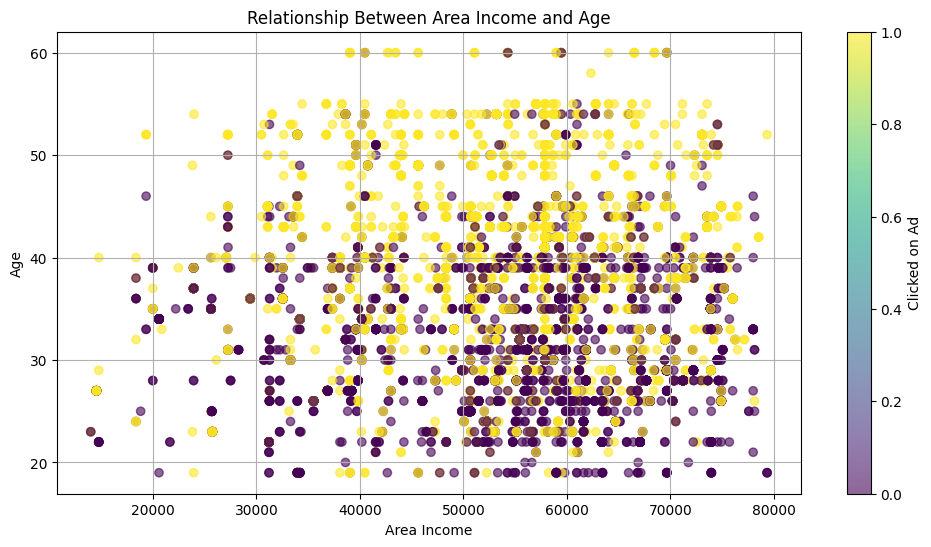

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Area Income'], df['Age'], c=df['Clicked on Ad'], cmap='viridis', alpha=0.6)
plt.xlabel('Area Income')
plt.ylabel('Age')
plt.title('Relationship Between Area Income and Age')
plt.colorbar(label='Clicked on Ad')
plt.grid(True)
plt.show()


This scatter plot graph titled "Relationship Between Area Income and Age" shows the correlation between area income and age. The x-axis represents area income (ranging from 20,000 to 80,000), and the y-axis represents age (approximately 20 to 60 years). The points are color-coded based on the likelihood of clicking on an ad, with purple indicating a lower probability (0.0) and yellow indicating a higher probability (1.0). The distribution of points suggests that there might be a relationship between area income, age, and the likelihood of clicking on an ad. This graph could be relevant for analyzing consumer behavior in relation to demographic factors.

<ipython-input-22-0836af6b34ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, palette="Set3")


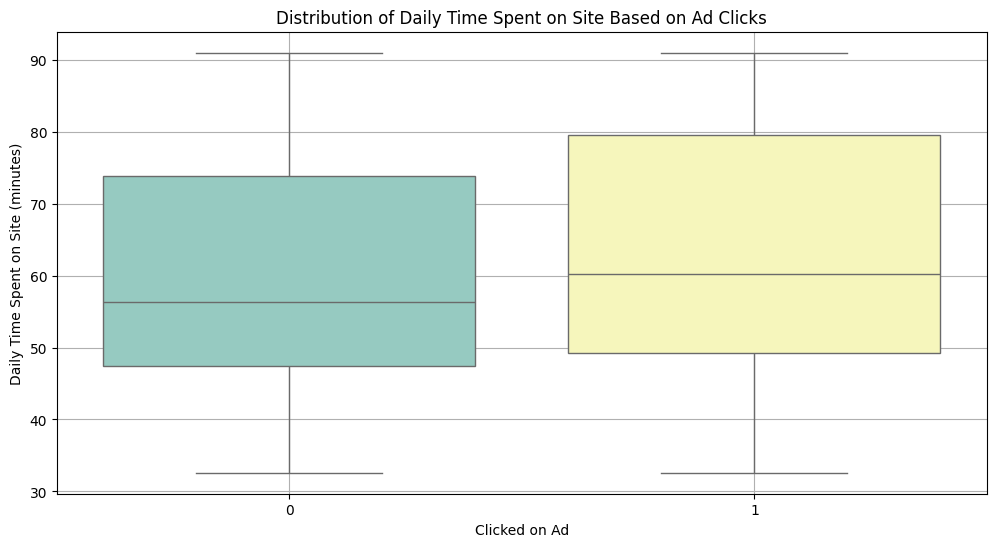

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, palette="Set3")
plt.xlabel('Clicked on Ad')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.title('Distribution of Daily Time Spent on Site Based on Ad Clicks')
plt.grid(True)
plt.show()


This box plot represents the distribution of daily internet usage based on ad clicks. It shows two distributions for daily internet usage in minutes: one for users who clicked on an ad (labeled as '1') and another for users who did not click on an ad (labeled as '0'). The y-axis is labeled "Daily Internet Usage (minutes)" and ranges from 100 to 275 minutes. The box plot for users who did not click on an ad is colored green, while the one for users who clicked on an ad is colored orange. This image visually illustrates how clicking on ads may be associated with the amount of time spent on the internet daily.

<ipython-input-23-07c2f31e90a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df, palette="Set2")


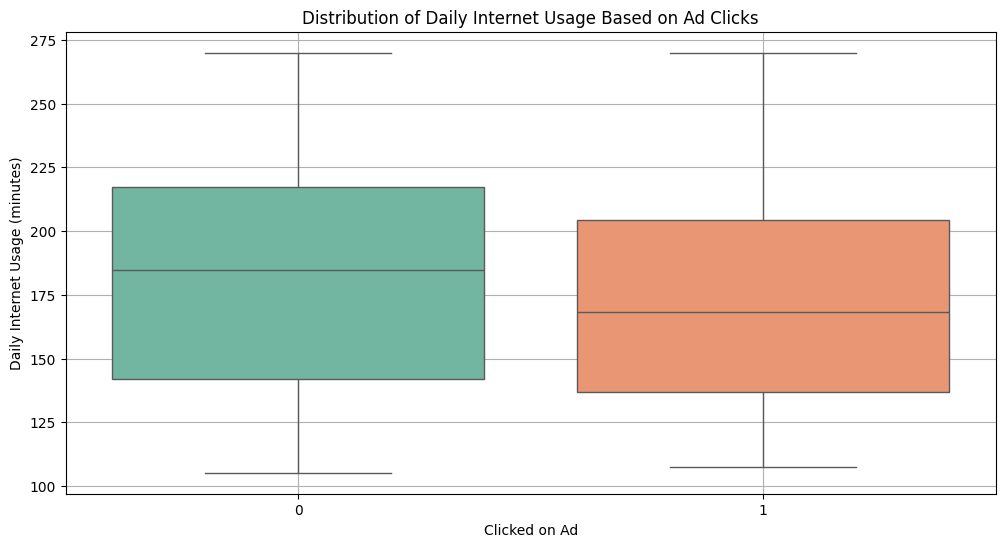

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df, palette="Set2")
plt.xlabel('Clicked on Ad')
plt.ylabel('Daily Internet Usage (minutes)')
plt.title('Distribution of Daily Internet Usage Based on Ad Clicks')
plt.grid(True)
plt.show()



This box plot represents the distribution of daily internet usage based on ad clicks. It shows two distributions for daily internet usage in minutes: one for users who clicked on an ad (labeled as '1') and another for users who did not click on an ad (labeled as '0'). The y-axis is labeled "Daily Internet Usage (minutes)" and ranges from 100 to 275 minutes. The box plot for users who did not click on an ad is colored green, while the one for users who clicked on an ad is colored orange. This image visually illustrates how clicking on ads may be associated with the amount of time spent on the internet daily.

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: Ad Topic Line
Unique Values: ['Decentralized real-time circuit' 'Optional full-range projection'
 'Total 5thgeneration standardization' 'Balanced empowering success'
 'Focused multi-state workforce' 'Optimized upward-trending productivity'
 'Programmable uniform website' 'Customizable tangible hierarchy'
 'Function-based incremental standardization'
 'Digitized content-based circuit'
 'Team-oriented transitional methodology'
 'Configurable disintermediate throughput' 'Intuitive radical forecast'
 'Front-line bandwidth-monitored capacity'
 'Inverse zero-defect capability' 'Intuitive exuding service-desk'
 'User-friendly client-server instruction set'
 'Synergized clear-thinking protocol' 'Configurable tertiary capability'
 'Secured 24hour policy' 'Total directional approach'
 'Extended context-sensitive monitoring'
 'De-engineered attitude-oriented projection'
 'Proactive context-sensitive project' 'Automated mobile model'
 'Synchronized multi-tasking ability'
 'Centralized logi

In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9785   │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 3     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                │ object      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Daily Time Spent on    │   0 │     0 │    61.6 │    15.7 │   32.6 │ 48.03 │ 59.59 │ 76.27 │ 90.97 │ ▆▆▇▅▆▅ │  │
│ │ Site                   │     │       │         │         │        │       │       │       │       │        │  │
│ │ Age                    │   0 │     0 │   35.84 │   8.539 │     19 │    29 │    35 │    41 │    60 │ ▃▇▇▅▃▁ │  │
│ │ Area Income            │   0 │     0 │   53950 │   13360 │  14000 │ 44170 │ 56180 │ 62670 │ 79330 │ ▁▃▃▇▇▃ │  │
│ │ Daily Internet Usage   │   0 │     0 │   177.9 │   40.86 │  105.2 │ 140.2 │ 178.9 │ 212.9 │   270 │ ▇▆▇▇▇▁ │  │
│ │ Clicked on Ad          │   0 │     0 │  0.4886 │  0.4999 │      0 │     0 │     0 │     1 │     1 │ ▇    ▇ │  │
│ │ Hour                   │   0 │     0 │   12.31 │   7.068 │      0 │     6 │    13 │    19 │    23 │ ▅▅▅▅▅▇ │  │
│ │ Month                  │   0 │     0 │   3.861 │   1.996 │      1 │     2 │     4 │     6 │     7 │ ▅▅▅▅▅▇ │  │
│ └────────────────────────┴─────┴───────┴─────────┴─────────┴────────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ first                      ┃ last                       ┃ frequency    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩  │
│ │ Timestamp        │    0 │       0 │    2016-01-01 02:52:10     │    2016-07-23 11:46:28     │ None         │  │
│ └──────────────────┴──────┴─────────┴────────────────────────────┴────────────────────────────┴──────────────┘  │
│                                            <class 'datetime.date'>                                              │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Date                   │      0 │         0 │ 2016-0

The skim function, often used in the context of the skimr package in R, provides a comprehensive summary of a dataframe. It summarizes each column's type, the number of missing values, and various statistics depending on the type of the column (numeric, categorical, etc.).

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df_numeric = df.drop(non_numeric_cols, axis=1)

correlation_matrix = df_numeric.corr(); correlation_matrix

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Hour,Month
Daily Time Spent on Site,1.000000,0.093117,0.020948,-0.052702,0.087020,0.010794,0.008363
Age,0.093117,1.000000,-0.041493,-0.101728,0.450654,0.082055,-0.021768
Area Income,0.020948,-0.041493,1.000000,0.041249,-0.064073,0.057423,0.004850
Daily Internet Usage,-0.052702,-0.101728,0.041249,1.000000,-0.124950,-0.020339,0.017073
Clicked on Ad,0.087020,0.450654,-0.064073,-0.124950,1.000000,0.128674,-0.047174
Hour,0.010794,0.082055,0.057423,-0.020339,0.128674,1.000000,-0.113836
Month,0.008363,-0.021768,0.004850,0.017073,-0.047174,-0.113836,1.000000


### Interpretation of the Correlation Matrix:

1. **Daily Time Spent on Site**:
   - Positively correlated with **Age** (0.093): Older users tend to spend slightly more time on the site.
   - Negatively correlated with **Daily Internet Usage** (-0.053): Users who spend more time on the site tend to spend slightly less time on the internet overall.

2. **Age**:
   - Strong positive correlation with **Clicked on Ad** (0.451): Older users are more likely to click on ads.
   - Negative correlation with **Daily Internet Usage** (-0.102): Older users tend to spend less time on the internet daily.
   - Positive correlation with **Hour** (0.082): Older users tend to be active on the site at later hours.

3. **Area Income**:
   - Weak positive correlation with **Daily Internet Usage** (0.041): Users with higher income tend to use the internet slightly more daily.
   - Weak negative correlation with **Clicked on Ad** (-0.064): Users with higher income are slightly less likely to click on ads.
   - Weak positive correlation with **Hour** (0.057): Users with higher income tend to be active on the site at slightly later hours.

4. **Daily Internet Usage**:
   - Negative correlation with **Clicked on Ad** (-0.125): Users who spend more time on the internet daily are less likely to click on ads.

5. **Clicked on Ad**:
   - Positive correlation with **Hour** (0.129): Users are more likely to click on ads during certain hours.
   - Negative correlation with **Month** (-0.047): There is a slight decrease in the likelihood of clicking on ads as months progress.

6. **Hour**:
   - Negative correlation with **Month** (-0.114): There is a slight trend where the activity on the site changes with the month.

- The strongest correlation observed is between **Age** and **Clicked on Ad** (0.451), indicating that older users are significantly more likely to click on ads.
- Other correlations are relatively weak, suggesting that while there are trends, they are not strong predictors.
- There is a mix of positive and negative correlations, indicating varied relationships between different variables.



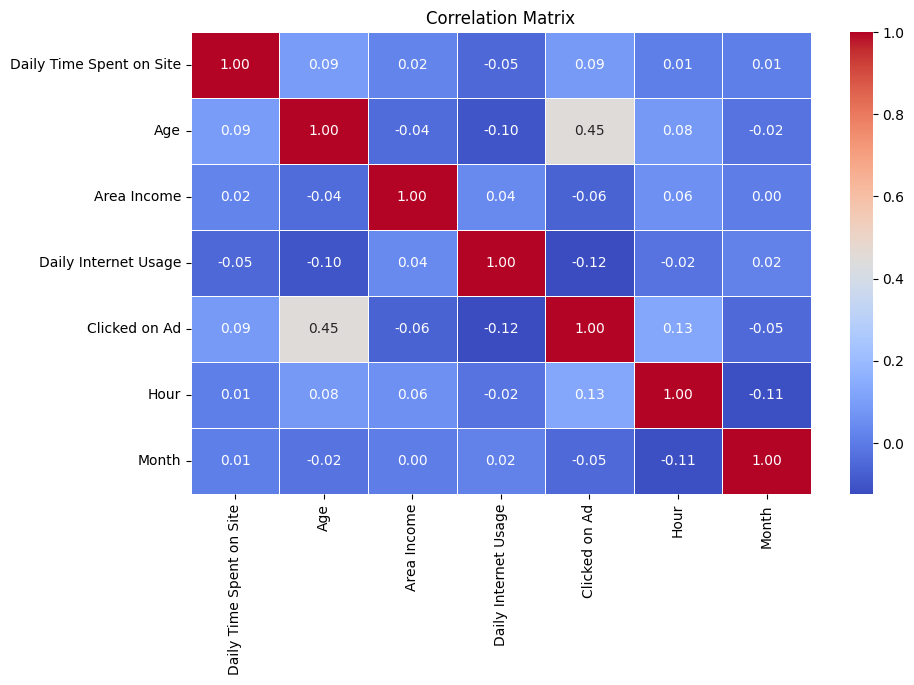

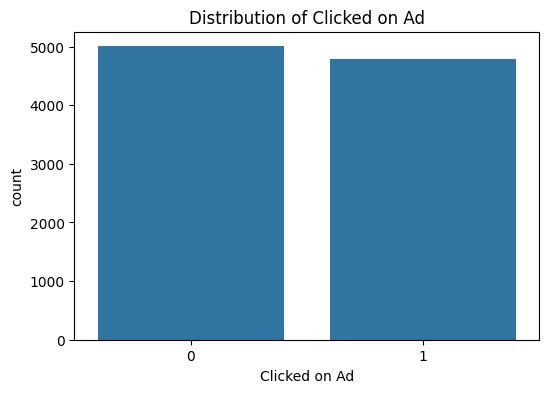

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Clicked on Ad', data=df)
plt.title('Distribution of Clicked on Ad')
plt.show()

In [ ]:
# Unique values in City and Country
print(f"Unique cities: {df['City'].nunique()}")
print(f"Unique countries: {df['Country'].nunique()}")

Unique cities: 521
Unique countries: 207


### Interpretation of Unique Values in City and Country:

1. **Unique Cities**:
   - **521 unique cities** are represented in the dataset. This indicates a wide geographic distribution of users, suggesting that the data is collected from a diverse range of urban areas.

2. **Unique Countries**:
   - **207 unique countries** are represented in the dataset. This suggests a very broad international scope, indicating that the dataset includes users from almost every country in the world.

- The dataset is highly diverse both in terms of cities and countries, covering a wide range of geographic locations.
- This extensive geographic diversity can provide deep insights into regional and international differences in user behavior, potentially helping in targeted marketing strategies and localized user engagement efforts.
- Understanding such diversity can also aid in identifying cultural or regional preferences that might impact user interaction with the site and ad-clicking behavior.

### The Timestamp column is separated by month, year and day in order to create new variables.

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Date,Hour,Month,Day,Year
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,2016-06-09,21,6,9,2016
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,2016-01-16,17,1,16,2016
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,2016-06-29,10,6,29,2016
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,2016-06-21,14,6,21,2016
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,2016-07-21,10,7,21,2016


##This code applies label encoding to categorical variables in a DataFrame:



In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply Label Encoding to categorical variables
categorical_columns = ['Ad Topic Line', 'City', 'Country', 'Gender']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Date,Hour,Month,Day,Year
0,62.26,32.0,69481.85,172.83,96,234,1,174,2016-06-09 21:43:05,0,2016-06-09,21,6,9,2016
1,41.73,31.0,61840.26,207.17,301,460,1,166,2016-01-16 17:56:05,0,2016-01-16,17,1,16,2016
2,44.40,30.0,57877.15,172.83,484,379,0,71,2016-06-29 10:50:45,0,2016-06-29,10,6,29,2016
3,59.88,28.0,56180.93,207.17,24,269,0,205,2016-06-21 14:32:32,0,2016-06-21,14,6,21,2016
4,49.21,30.0,54324.73,201.58,484,495,0,149,2016-07-21 10:54:35,1,2016-07-21,10,7,21,2016


## Detect outliers

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in selected columns
numerical_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
for col in numerical_columns:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col}:")
    print(outliers)
    print("-" * 30)

Outliers in Daily Time Spent on Site:
Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Gender, Country, Timestamp, Clicked on Ad, Date, Hour, Month, Day, Year]
Index: []
------------------------------
Outliers in Age:
      Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
223                      56.39  60.0     69646.35                218.61   
447                      47.64  60.0     69646.35                186.37   
932                      51.87  60.0     51067.54                119.86   
970                      59.51  60.0     40468.53                218.61   
1073                     59.51  60.0     58966.22                153.76   
1093                     80.30  60.0     68448.94                195.69   
1227                     81.75  60.0     58966.22                124.54   
1510                     51.87  60.0     51067.54                218.61   
1551                     51.87  60.0     54

This code detects outliers in numerical columns of a DataFrame using the Interquartile Range (IQR) method.

The function `detect_outliers(df, column)`:
- Computes the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR) for the specified column of the DataFrame.
- Calculates the lower bound (`lower_bound`) and upper bound (`upper_bound`) based on the defined formulas to identify outliers according to the IQR method.

Subsequently, for each specified numerical column (`'Daily Time Spent on Site'`, `'Age'`, `'Area Income'`, `'Daily Internet Usage'`):
- The `detect_outliers` function is called to identify outliers in each column.

In [ ]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for col in numerical_columns:
    df = cap_outliers(df, col)

##  Split the data

In [ ]:
X = df[[ 'Ad Topic Line','Area Income','Age','Daily Time Spent on Site', 'Daily Internet Usage', 'City', 'Country','Gender', 'Hour', 'Day', 'Month']]
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled contains the training data after standardization, and X_test_scaled contains the test data scaled using the parameters learned from the training data. This preprocessing step ensures that both training and test datasets are standardized in a consistent manner before applying machine learning models.








## Initialize models

###this code sets up, trains, evaluates, and cross-validates several classification models on standardized data (X_train_scaled, X_test_scaled). It provides comprehensive evaluation metrics to assess and compare the performance of each model, ensuring robustness through cross-validation.

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print evaluation results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Cross-validation scores for {model_name}: {cv_scores}")
    print(f"Mean CV score for {model_name}: {cv_scores.mean():.4f}")
    print("-" * 30)


Model: Logistic Regression
Accuracy: 0.7292
Precision: 0.7306
Recall: 0.6961
F1 Score: 0.7129
------------------------------
Model: Decision Tree
Accuracy: 0.7548
Precision: 0.7424
Recall: 0.7539
F1 Score: 0.7481
------------------------------
Model: Random Forest
Accuracy: 0.8331
Precision: 0.8478
Recall: 0.7976
F1 Score: 0.8219
------------------------------
Model: Gradient Boosting
Accuracy: 0.8130
Precision: 0.8294
Recall: 0.7715
F1 Score: 0.7994
------------------------------
Cross-validation scores for Logistic Regression: [0.73357664 0.73722628 0.72189781 0.72554745 0.72096421]
Mean CV score for Logistic Regression: 0.7278
------------------------------
Cross-validation scores for Decision Tree: [0.73722628 0.74379562 0.73576642 0.74817518 0.74360847]
Mean CV score for Decision Tree: 0.7417
------------------------------
Cross-validation scores for Random Forest: [0.84233577 0.82335766 0.80437956 0.83430657 0.84002922]
Mean CV score for Random Forest: 0.8289
--------------------

- **Accuracy:** Random Forest has the highest accuracy (0.8331), followed by Gradient Boosting (0.8130), Decision Tree (0.7548), and Logistic Regression (0.7292).
  
- **Precision:** Random Forest also leads in precision (0.8478), indicating it has the lowest false positive rate among the models. Gradient Boosting (0.8294), Decision Tree (0.7424), and Logistic Regression (0.7306) follow.

- **Recall:** Random Forest again comes out on top with a recall of 0.7976, meaning it captures the most true positives. It is followed by Gradient Boosting (0.7715), Decision Tree (0.7539), and Logistic Regression (0.6961).

- **F1 Score:** The Random Forest model has the highest F1 score (0.8219), balancing precision and recall effectively. Gradient Boosting (0.7994), Decision Tree (0.7481), and Logistic Regression (0.7129) follow.

- **Cross-Validation Scores:** Random Forest consistently performs the best across different folds, with the highest mean CV score (0.8289). Gradient Boosting (0.8156), Decision Tree (0.7417), and Logistic Regression (0.7278) follow.

The **Random Forest** model outperforms the other models in all metrics and has the highest mean cross-validation score, indicating it is the most reliable and robust model for this dataset. If computational resources and interpretability are not major concerns, Random Forest should be the preferred choice.

### RandomForestClassifier

### Evaluating the Model
- **Precision**: The ratio of correctly predicted positive instances (True Positive) to the total predicted positive instances (True Positive + False Positive). Precision is 82% for class 0 and 84% for class 1.
  
- **Recall**: The ratio of correctly predicted positive instances (True Positive) to all actual positive instances (True Positive + False Negative). Recall is 86% for class 0 and 80% for class 1.
  
- **F1-score**: The harmonic mean of precision and recall, providing a comprehensive measure of model accuracy. F1-score is 84% for class 0 and 82% for class 1.
  
- **Accuracy**: The ratio of correctly predicted instances to the total instances. The overall accuracy of the model is 83%, indicating that 83% of the test samples are correctly classified.

These evaluations demonstrate that the Random Forest model trained on this dataset performs well overall, with adequate precision, recall, and overall accuracy for the given classification task.

##  ROC curves

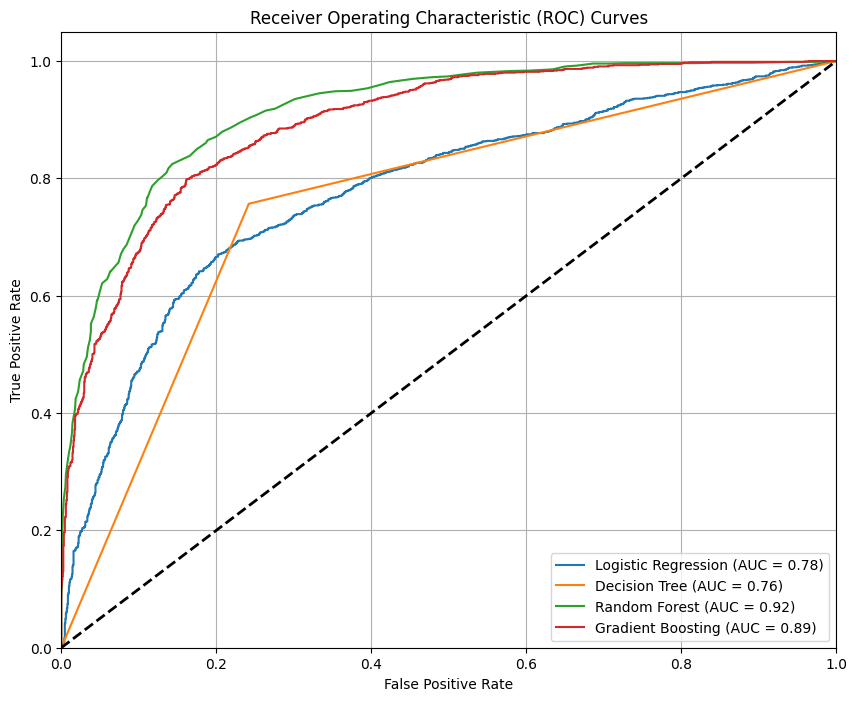

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- The graph displays the performance of different classification models using Receiver Operating Characteristic (ROC) curves.
- Each curve represents a different model:
    - **Logistic Regression (AUC = 0.78)**: This model has an area under the curve (AUC) of 0.78, indicating moderate performance.
    - **Decision Tree (AUC = 0.76)**: The decision tree model performs slightly worse with an AUC of 0.76.
    - **Random Forest (AUC = 0.92)**: The random forest model shows excellent performance with an AUC of 0.92.
    - **Gradient Boosting (AUC = 0.89)**: The gradient boosting model also performs well, with an AUC of 0.89.
- The x-axis represents the false positive rate, while the y-axis represents the true positive rate.
- The top-left corner of each curve corresponds to optimal performance, where both sensitivity and specificity are high.
- The AUC provides a measure of how well each model distinguishes between classes; higher AUC values indicate better performance.



## MODEL with pipeline

In [ ]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create pipelines for each model
pipelines = {model_name: Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', model)
]) for model_name, model in models.items()}

# Train and evaluate models
results = {}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print evaluation results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Cross-validation
for model_name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f"Cross-validation scores for {model_name}: {cv_scores}")
    print(f"Mean CV score for {model_name}: {cv_scores.mean():.4f}")
    print("-" * 30)

Model: Logistic Regression
Accuracy: 0.7292
Precision: 0.7306
Recall: 0.6961
F1 Score: 0.7129
------------------------------
Model: Decision Tree
Accuracy: 0.7612
Precision: 0.7474
Recall: 0.7638
F1 Score: 0.7555
------------------------------
Model: Random Forest
Accuracy: 0.8334
Precision: 0.8500
Recall: 0.7955
F1 Score: 0.8219
------------------------------
Model: Gradient Boosting
Accuracy: 0.8130
Precision: 0.8294
Recall: 0.7715
F1 Score: 0.7994
------------------------------
Cross-validation scores for Logistic Regression: [0.73357664 0.73722628 0.72189781 0.72554745 0.72096421]
Mean CV score for Logistic Regression: 0.7278
------------------------------
Cross-validation scores for Decision Tree: [0.74525547 0.74379562 0.73722628 0.74963504 0.73995617]
Mean CV score for Decision Tree: 0.7432
------------------------------
Cross-validation scores for Random Forest: [0.84233577 0.82262774 0.82262774 0.84160584 0.83272462]
Mean CV score for Random Forest: 0.8324
--------------------